<p style="font-size:small; color:gray;"> Author: 鄭永誠, Year: 2024 </p>

# 使用LangGraph實踐LLM Agent流程 - 1
----------

## Agents 定義
- 在LLM中，Agent泛指一種工具或實體，它能夠自動執行特定的任務或功能

- 這些代理通常被設計來與外部數據源、API或其他工具交互，以增強LLM的功能

- 通過結合外部工具或程式碼，Agent可以幫助LLM進行更複雜的推理和決策過程  

(資料來源 https://chat.openai.com)

## LangChain Agent範例
- 可參考[官網](https://python.langchain.com/v0.1/docs/modules/agents/)自行嘗試實作

- [Agent Types](https://python.langchain.com/v0.1/docs/modules/agents/agent_types/)




## LangChain內建工具
- LangChain裡就有相關工具可以使用，下面程式舉幾個範例

- ```from langchain.agents import load_tools```  

可以直接使用整合好的工具，如```"llm-math"```, ```"wikipedia"```

- ```from langchain.tools.python.tool import PythonREPLTool```  

提供了一個命令行界面，允許用戶逐行輸入 Python 代碼並立即執行

- 也能用[官方](https://python.langchain.com/v0.1/docs/modules/tools/)的方式去調用



In [1]:
""" numexpr, wikipedia 是我要下面用 "llm-math", "wikipedia" 工具時所需的前置套件"""
%pip install numexpr -q
%pip install wikipedia -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
""" 
這裡是基本Agent調用 和 langchain load_tools 操作範例
注意，這邊是直接拿 langchain.agents 的預設提供功能去做操作，
他中間流程執行效率可能不是最佳，但是對於初學者來說是最簡單的方式實踐，
這邊只是讓大家看到最簡單的操作方式，實際上可以根據需求去做更多的調整
"""

import os

from langchain.agents import load_tools, initialize_agent
from langchain.agents import AgentType
from langchain_groq import ChatGroq

# Create the Groq client
api_key = os.getenv("GROQ_API_KEY")

llm = ChatGroq(
    model="llama-3.1-70b-versatile",
    temperature=0.1, # 我故意調低點，讓回答更精確不要太創意
    max_tokens=None,
    timeout=None,
    max_retries=3,
    api_key=api_key,
)

# 用langchain整合好的load_tools載入工具
tools = load_tools(["llm-math","wikipedia"], llm=llm)

# 創建一個Agent，並初始化及定義可使用的工具
agent = initialize_agent(
    tools, # 使用的工具
    llm, # 使用的模型
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION, # 主要用於聊天場景的一種Agent Type，可參考文件選擇
    handle_parsing_errors=True,
    verbose = True
)

C:\Users\PipiHi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 0.3.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(


In [3]:
# 範例一，問一個數學問題；理論上你可以看到他調用了數學工具去處理還有詳細執行流程
agent(f"1+2+3...到+10是多少?")



> Entering new AgentExecutor chain...
Thought: To find the sum of the series 1+2+3+...+10, we can use the formula for the sum of an arithmetic series.

Action:
```
{
  "action": "Calculator",
  "action_input": "1+2+3+4+5+6+7+8+9+10"
}
```

Observation: Answer: 55
Thought:Thought: Now that we have the sum of the series, we can provide the final answer.

Final Answer: The final answer is 55.

> Finished chain.


{'input': '1+2+3...到+10是多少?', 'output': 'The final answer is 55.'}

In [ ]:
# 範例二，問一個事件問題；理論上你可以看到他調用了wikipedia去處理
agent("歐巴馬的當選票數是多少?")




> Entering new AgentExecutor chain...
Thought: To find the number of votes Obama received in the election, I need to look up the information on Wikipedia.

Action:
```
{
  "action": "wikipedia",
  "action_input": "Barack Obama presidential election, 2008"
}
```

Observation: Page: Barack Obama 2008 presidential campaign
Summary: Barack Obama, then junior United States senator from Illinois, announced his candidacy for president of the United States on February 10, 2007, in Springfield, Illinois. After winning a majority of delegates in the Democratic primaries of 2008, on August 23, leading up to the convention, the campaign announced that Senator Joe Biden of Delaware would be the vice presidential nominee. At the 2008 Democratic National Convention on August 27, Barack Obama was formally selected as the Democratic Party nominee for president of the United States in 2008. He was the first African American in history to be nominated on a major party ticket.  On November 4, 2008, Obam

{'input': '歐巴馬的當選票數是多少?', 'output': '歐巴馬獲得了69.5 million張選票。'}

------------
## # LangGraph
- LangGraph 是一套建構於LangChain 框架之上的開發套件，實踐Agent流程的套件

- 可與LangChain 現有的鏈、各模組工具等無縫銜接

- 實踐多流程關聯性定義去部署應用 

In [ ]:
""" 下載langgraph套件 """
%pip install -U langgraph -q
%pip install langchain-anthropic -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\PipiHi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\PipiHi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### 最單純流程、記憶對話流程範例

In [13]:
import os

from typing import Annotated, Literal, TypedDict

from langchain_core.messages import HumanMessage
from langchain_anthropic import ChatAnthropic
from langchain_core.tools import tool
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, StateGraph, MessagesState
from langgraph.prebuilt import ToolNode
from langchain_groq import ChatGroq
import textwrap

# 這邊加個範例示意，你也可以定義各種工具函數讓LLM使用（這邊只是示意）
@tool
def multiply(a: int, b: int) -> int:
    """乘法運算兩個數字。"""
    return a * b

math_tool = load_tools(["llm-math","wikipedia"], llm=llm)
wiki_tools = load_tools(["wikipedia"], llm=llm)
mult_tool = multiply # 僅示意，你可以自己定義更多的工具函數


# 定義工具節點，這邊因為是範例只加上math_tool
tool_node = ToolNode(math_tool)

# 定義 LLM 模型，一樣使用 Groq 實踐操作
model = ChatGroq(temperature=0, groq_api_key=os.getenv('GROQ_API_KEY'), model_name="llama-3.1-70b-versatile")

# 定義決定是否繼續的函數
def should_continue(state: MessagesState) -> Literal["tools", END]:
    messages = state['messages']
    last_message = messages[-1]

    # 如果 LLM 調用了工具，則route to "tools" 節點
    if last_message.tool_calls:
        return "tools"
    
    # Otherwise, we stop (reply to the user)
    return END


# 定義調用模型的函數
def call_model(state: MessagesState):

    messages = state['messages']
    response = model.invoke(messages)

    # 注意這邊 response 是 return a list, 因為之後會增加資訊到已有的訊息中
    return {"messages": [response]}


# 定義一個新的workflow
workflow = StateGraph(MessagesState)

# 定義我們的兩個節點(agent, tools)
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

# 設定開始節點為 `agent`
workflow.set_entry_point("agent")

# 添加一條條件邊，同字義，如果滿足條件則走向下一個節點
workflow.add_conditional_edges(
    # source填入起點節點
    source="agent",
    # path填入一個function，用來決定下一步給誰，可看我上面should_continue設定，如果使用工具就走tools節點，沒的話就結束
    path=should_continue,
)

# 現在我們添加一條普通邊從 `tools` 到 `agent`，普通邊代表無特殊條件的基本順序流程
workflow.add_edge("tools", 'agent')

# 初始化記憶體，你可以理解為當個有記憶的 graph, 記錄多使用者的資料
checkpointer = MemorySaver()

# Compile 成 LangChain Runnable，這裡假設有使用到checkpointer
app = workflow.compile(checkpointer=checkpointer)

In [14]:
""" 執行，"thread_id"就是代表紀錄檔，可自定義 """

# 執行問題
final_state = app.invoke(
    {"messages": [HumanMessage(content="動畫名偵探柯南的經典台詞是什麼?")]},
    config={"configurable": {"thread_id": "鄭永誠的紀錄檔"}}
)
final_state["messages"][-1].content

'"阿笠博士的發明總是會引起麻煩"'

In [15]:
""" 使用同個"thread_id"就是代表同個紀錄檔，所以他會記得上次的對話 """

# 執行問題
final_state = app.invoke(
    {"messages": [HumanMessage(content="還有呢?")]},
    config={"configurable": {"thread_id": "鄭永誠的紀錄檔"}}
)
final_state["messages"][-1].content

'"真相只有一个"'

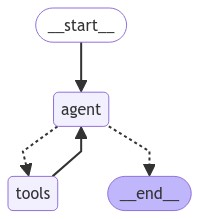

In [16]:
""" 你也可以畫出來看流程圖 """

from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))